# Table of Contents
1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5. [Modeling](#modeling)
6. [Results](#results)
7. [Conclusion](#conclusion)
8. [References](#references)

## Introduction

For this project we used a dataset containing recorded vehicle collisions in New York City, that spanned from 2012 to present day. This notebook serves as the primary record of all of the steps taken in order to produce the final dataset and accompanying Machine Learning Models.

## Data Overview

In [2]:
import pandas as pd

This project makes use of two datasets found on NYC Open Data, one that contains a record of every motorvehicle collision in NYC that resulted in injury and/or at least $1000 in damage and on that contains a record of every vehicle involved in those collisions.

Both Data Sets required extensive cleaning as they contained a large number of missing values and manually input text that often contained abbreviations and mispellings. 

### Data Set

This dataset and its corresponding metadata is made publicly available at NYC Open Data (https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data)

In [43]:
df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')

C:\Users\dougl\AppData\Local\Temp\ipykernel_3864\3051791133.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')


### Data Characteristics

In [4]:
df.shape

(2108711, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108711 entries, 0 to 2108710
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [6]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

The original raw dataset contains over 2.1 million values and has 29 different features. 

Of the 29 features there are 4 floats, 7 integers and 18 objects or strictly categorical features. 

At first glance it appears that 2 of the float columns are incorrectly representing what should be a discrete numeric value as continous numeric. Notice how the NUMBER OF PERSONS INJURED as well as the NUMBER OF PERSONS KILLED columns are of the float64 type. 

## Data Cleaning

### Missing Values

The features in our dataset essentially fall into 5 distinct categories; temporal, spatial, severity, contributing factors and vehicle. 

In [7]:
print(df.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           655943
ZIP CODE                          656202
LATITUDE                          237660
LONGITUDE                         237660
LOCATION                          237660
ON STREET NAME                    450171
CROSS STREET NAME                 801463
OFF STREET NAME                  1750913
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7021
CONTRIBUTING FACTOR VEHICLE 2     329203
CONTRIBUTING FACTOR VEHICLE 3    1957400
CONTRIBUTING FACTOR VEHICLE 4    2074436
CONTRIBUTING FACTOR VEHICLE 5    2099407
COLLISION_ID                           0
VEHICLE TYPE COD

In [49]:
cols = ['LATITUDE', 'LONGITUDE', 'BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1']
sev_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']
print("Number of Missing Values")
print(df[cols].isnull().sum())

Number of Missing Values
LATITUDE                          237660
LONGITUDE                         237660
BOROUGH                           655943
ZIP CODE                          656202
ON STREET NAME                    450171
CROSS STREET NAME                 801463
OFF STREET NAME                  1750913
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
CONTRIBUTING FACTOR VEHICLE 1       7021
VEHICLE TYPE CODE 1                14200
dtype: int64


In [50]:
print("Number of Missing Values")
print(df[sev_cols].isnull().sum())

Number of Missing Values
NUMBER OF PERSONS INJURED        18
NUMBER OF PERSONS KILLED         31
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
dtype: int64


In [45]:
missing_percentage = df[cols].isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
LATITUDE                         11.270392
LONGITUDE                        11.270392
BOROUGH                          31.106349
ZIP CODE                         31.118631
ON STREET NAME                   21.348160
CROSS STREET NAME                38.007247
OFF STREET NAME                  83.032383
NUMBER OF PERSONS INJURED         0.000854
NUMBER OF PERSONS KILLED          0.001470
CONTRIBUTING FACTOR VEHICLE 1     0.332952
VEHICLE TYPE CODE 1               0.673397
dtype: float64


#### What We Have

Fortunately the temporal data such as date and time are complete for the dataset as those values would be impossible to replace with confidence. 

Theres also minimal data missing from the Severity type columns (Number of killed/injured) with 18 values missing from Number of persons killed and 31 values missing (out of over 2.1million) from NUMBER OF PERSONS INJURED and NUMBER OF PERSONS KILLED respectively.  

#### What We Are Missing

We are missing a great deal of spatial type data (BOROUGH, ZIP CODE, LONGITUDE/LATITUDE, ON/OFF/CROSS STREET NAMES).

We are missing a great deal of Contributing Factor data (CONTRIBUTING FACTOR 2-5)

and we are also missing a great deal of Vehicle data (Vehicle Type 2-5)

#### Persons Injured and Persons Killed

In [10]:
print(df['NUMBER OF PERSONS INJURED'].value_counts())
print(df['NUMBER OF PERSONS KILLED'].value_counts())

NUMBER OF PERSONS INJURED
0.0     1619939
1.0      379252
2.0       71478
3.0       23403
4.0        8671
5.0        3312
6.0        1395
7.0         586
8.0         263
9.0         132
10.0         85
11.0         52
12.0         32
13.0         27
15.0         16
14.0          9
16.0          8
18.0          6
17.0          6
19.0          4
22.0          3
24.0          3
20.0          2
40.0          1
31.0          1
27.0          1
32.0          1
43.0          1
21.0          1
23.0          1
34.0          1
25.0          1
Name: count, dtype: int64
NUMBER OF PERSONS KILLED
0.0    2105610
1.0       2974
2.0         77
3.0         12
4.0          4
5.0          2
8.0          1
Name: count, dtype: int64


##### Persons Killed

In [11]:
nan_killed = df[df['NUMBER OF PERSONS KILLED'].isna()]
nan_killed.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
514788,12/22/2018,16:30,BRONX,10467.0,40.865532,-73.862380,"(40.865532, -73.86238)",BOSTON ROAD,ALLERTON AVENUE,NaN,...,NaN,NaN,NaN,NaN,4051650,NaN,NaN,NaN,NaN,NaN
517203,12/29/2018,9:30,MANHATTAN,10036.0,40.755450,-73.981560,"(40.75545, -73.98156)",NaN,NaN,50 WEST 44 STREET,...,Unspecified,NaN,NaN,NaN,4056211,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
542859,11/01/2018,4:35,MANHATTAN,10017.0,40.751698,-73.976690,"(40.751698, -73.97669)",NaN,NaN,110 EAST 42 STREET,...,NaN,NaN,NaN,NaN,4028365,Taxi,NaN,NaN,NaN,NaN
548664,10/19/2018,15:26,BROOKLYN,11201.0,40.693653,-73.986190,"(40.693653, -73.98619)",NaN,NaN,83 LAWRENCE STREET,...,Unspecified,NaN,NaN,NaN,4026515,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
563192,10/02/2018,15:07,BRONX,10458.0,40.862614,-73.890114,"(40.862614, -73.890114)",WEBSTER AVENUE,EAST 193 STREET,NaN,...,NaN,NaN,NaN,NaN,4026434,Taxi,NaN,NaN,NaN,NaN


In [12]:
kill_cols = ['NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','NUMBER OF PERSONS KILLED']
nan_killed = nan_killed[kill_cols]
nan_killed
    

,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED,NUMBER OF PERSONS KILLED
514788,0,0,0,NaN
517203,0,0,0,NaN
542859,0,0,0,NaN
548664,0,0,0,NaN
563192,0,0,0,NaN
564116,0,0,0,NaN
569416,0,0,0,NaN
590249,0,0,0,NaN
597447,0,0,0,NaN
640540,0,0,0,NaN


The NUMBER OF PERSONS KILLED column appears to be the result of adding the NUMBER OF PEDESTRIANS KILLED,	NUMBER OF CYCLIST KILLED and NUMBER OF MOTORIST KILLED columns so given that there are no missing values for the supporting columns it is relatively safe to assume that the missing values for the NUMBER OF PERSONS KILLED column can simply be replaced with 0.

In [13]:
# Replace NaN values with 0 in specific columns
columns_to_fill = ['NUMBER OF PERSONS KILLED']
df[columns_to_fill] = df[columns_to_fill].fillna(0)
print("NUMBER OF PERSONS KILLED values that are null:", df['NUMBER OF PERSONS KILLED'].isnull().sum())

NUMBER OF PERSONS KILLED values that are null: 0


##### Persons Injured

In [14]:
nan_injured = df[df['NUMBER OF PERSONS INJURED'].isna()]
nan_injured

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
182167,01/28/2021,10:10,NaN,NaN,40.866600,-73.895454,"(40.8666, -73.895454)",EAST KINGSBRIDGE ROAD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4387369,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
569416,09/30/2018,6:30,QUEENS,11368.0,40.749767,-73.863810,"(40.749767, -73.86381)",NaN,NaN,102-21 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,4026403,Taxi,NaN,NaN,NaN,NaN
618812,07/23/2018,12:50,BROOKLYN,11221.0,40.686030,-73.932680,"(40.68603, -73.93268)",STUYVESANT AVENUE,PUTNAM AVENUE,NaN,...,NaN,NaN,NaN,NaN,4026185,Sedan,NaN,NaN,NaN,NaN
668860,05/16/2018,8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4026020,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
711975,02/01/2018,16:08,QUEENS,11369.0,40.759315,-73.862200,"(40.759315, -73.8622)",NaN,NaN,32-20 107 STREET,...,Unspecified,NaN,NaN,NaN,4025523,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
728629,01/05/2018,15:00,BRONX,10465.0,40.822437,-73.837040,"(40.822437, -73.83704)",NaN,NaN,2478 WENNER PLACE,...,NaN,NaN,NaN,NaN,4025431,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
777918,10/30/2017,15:45,NaN,NaN,40.703686,-73.909180,"(40.703686, -73.90918)",LINDEN STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4025371,Sedan,NaN,NaN,NaN,NaN
801680,10/05/2017,17:40,NaN,NaN,40.699844,-73.991035,"(40.699844, -73.991035)",CADMAN PLAZA WEST,NaN,NaN,...,NaN,NaN,NaN,NaN,4024976,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
804061,09/11/2017,8:40,NaN,NaN,40.711710,-73.835760,"(40.71171, -73.83576)",UNION TURNPIKE,NaN,NaN,...,NaN,NaN,NaN,NaN,4024799,NaN,NaN,NaN,NaN,NaN
810749,09/03/2017,16:30,MANHATTAN,10002.0,40.716846,-73.989555,"(40.716846, -73.989555)",NaN,NaN,344 GRAND STREET,...,NaN,NaN,NaN,NaN,4024788,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [15]:
injured_cols = ['COLLISION_ID', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED','NUMBER OF PERSONS INJURED']
nan_injured = nan_injured[injured_cols] 
nan_injured

,COLLISION_ID,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,NUMBER OF PERSONS INJURED
182167,4387369,0,1,0,NaN
569416,4026403,0,0,1,NaN
618812,4026185,0,0,1,NaN
668860,4026020,0,0,0,NaN
711975,4025523,0,0,1,NaN
728629,4025431,0,0,0,NaN
777918,4025371,0,0,0,NaN
801680,4024976,0,0,0,NaN
804061,4024799,0,0,0,NaN
810749,4024788,0,0,0,NaN


In contrast to the NUMBER OF PERSONS KILLED nan values, where the resulting tally for all of the missing values appeared to have been zero, we are not as lucky with NUMBER OF PERSONS INJURED. While there are indeed a few values that should be zero, there are also several that containg CYCLYSTS INJURED and MOTORISTS INJURED. Therefore we should correct these values. 

To aid in correcting these values we have included the relevant COLLISION_ID column, since this is a relatively small correction we shall be doing this manually. 

In [16]:
# COLLISION_ID as keys and NUMBER OF PERSONS INJURED as values
corrections = {
    4387369: 1,  
    4026403: 1,
    4026185: 1,
    4025523: 1,
    4024624: 2,
    4024290: 1
}

# Update the NUMBER OF PERSONS INJURED based on COLLISION_ID
for collision_id, injured_count in corrections.items():
    df.loc[df['COLLISION_ID'] == collision_id, 'NUMBER OF PERSONS INJURED'] = injured_count
    
print("NUMBER OF PERSONS INJURED values that are null:", df['NUMBER OF PERSONS INJURED'].isnull().sum())

NUMBER OF PERSONS INJURED values that are null: 12


In [17]:
cols = injured_cols = ['COLLISION_ID', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED','NUMBER OF PERSONS INJURED']
orig = df[df['COLLISION_ID'].isin(corrections.keys())]
orig[cols]


,COLLISION_ID,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,NUMBER OF PERSONS INJURED
182167,4387369,0,1,0,1.0
569416,4026403,0,0,1,1.0
618812,4026185,0,0,1,1.0
711975,4025523,0,0,1,1.0
832689,4024624,0,0,2,2.0
895760,4024290,0,1,0,1.0


As you can see it is verified that the values were corrected to reflect the individual tallies

#### Location Values

##### Street Names

In [18]:
df['ON STREET NAME'].value_counts()

ON STREET NAME
BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
                                    ...  
MAPLEWOOD AVENUE                        1
BEACH 144 STREET                        1
WEST 16 ROAD                            1
37 avenue                               1
3 Avenue                                1
Name: count, Length: 18572, dtype: int64

The original dataset contains 18552 unique values. On closer observation however it becomes apparent that there are a great number of typos 

### Handling Categorical Data
#### Contributing Factor Vehicles
There are many contributing factors as to why a vehicle was involved in a collision. The goal is to standardize/correct spelling of factors (e.g. 'Illnes'), remove any possibly mistakenly entered values (e.g. '80', '1'), and group together various ways of referring to the same factor (e.g. multiple versions of what boils down to electronic use)

In [19]:
df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')

#Print all possible contributing factors for vehicles involved in collisions
contributing_factors_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'] 
unique_contributing_factors = pd.concat(df[col] for col in contributing_factors_cols).unique()
print(unique_contributing_factors)

C:\Users\dougl\AppData\Local\Temp\ipykernel_3864\3676302474.py:1: DtypeWarning: Columns (4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')


['improper driving technique' 'unspecified' nan 'traffic rule violation'
 'external distraction/obstacle' 'vehicle defect'
 'driver distraction/impairment' 'poor road conditions' 'alcohol/drug use'
 'electronics use' 'police chase']


In [20]:
#Standardize spelling, remove incorrectly entered values, and group together similar values.
factors_mapping = {
    #IMPROPER DRIVING TECHNIQUE
    #General poor etiquette on the road--not in violation of any particular rule/law--that causes an accident
    'Following Too Closely': 'Improper Driving Technique',
    'Passing Too Closely': 'Improper Driving Technique',
    'Driver Inexperience': 'Improper Driving Technique',
    'Passing or Lane Usage Improper': 'Improper Driving Technique',
    'Turning Improperly': 'Improper Driving Technique',
    'Unsafe Lane Changing': 'Improper Driving Technique',
    'Backing Unsafely': 'Improper Driving Technique',
    'Aggressive Driving/Road Rage': 'Improper Driving Technique',

    #TRAFFIC RULE VIOLATION
    #Violation of a particular rule/law on the road that leads to an accident
    'Traffic Control Disregarded': 'Traffic Rule Violation',
    'Failure to Yield Right-of-Way': 'Traffic Rule Violation',
    'Failure to Keep Right': 'Traffic Rule Violation',
    'Unsafe Speed': 'Traffic Rule Violation',

    #POOR ROAD CONDITIONS
    #Any road condition that makes driving difficult and causes an accident
    'Pavement Slippery': 'Poor Road Conditions',
    'View Obstructed/Limited': 'Poor Road Conditions',
    'Glare': 'Poor Road Conditions',
    'Obstruction/Debris': 'Poor Road Conditions',
    'Pavement Defective': 'Poor Road Conditions',
    'Lane Marking Improper/Inadequate': 'Poor Road Conditions',
    'Traffic Control Device Improper/Non-Working': 'Poor Road Conditions',
    'Shoulders Defective/Improper': 'Poor Road Conditions',

    #EXTERNAL DISTRACTION/OBSTACLE
    #Any outside car/bike/pedestrian/animal that causes an accident
    'Reaction to Uninvolved Vehicle': 'External Distraction/Obstacle',
    'Reaction to Other Uninvolved Vehicle': 'External Distraction/Obstacle',
    'Other Vehicular': 'External Distraction/Obstacle',
    'Oversized Vehicle': 'External Distraction/Obstacle',
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'External Distraction/Obstacle',
    'Animals Action': 'External Distraction/Obstacle',
    'Outside Car Distraction': 'External Distraction/Obstacle',
    'Vehicle Vandalism': 'External Distraction/Obstacle',

    #VEHICLE DEFECT
    #A malfunction/breakdown of a vehicle that causes it to be involved in an accident
    'Steering Failure': 'Vehicle Defect',
    'Brakes Defective': 'Vehicle Defect',
    'Tinted Windows': 'Vehicle Defect',
    'Other Lighting Defects': 'Vehicle Defect',
    'Driverless/Runaway Vehicle': 'Vehicle Defect',
    'Tire Failure/Inadequate': 'Vehicle Defect',
    'Headlights Defective': 'Vehicle Defect',
    'Accelerator Defective': 'Vehicle Defect',
    'Tow Hitch Defective': 'Vehicle Defect',
    'Windshield Inadequate': 'Vehicle Defect',

    #ALCOHOL/DRUG USE
    #Any substance use (legal or illegal) that causes an accident
    'Alcohol Involvement': 'Alcohol/Drug Use',
    'Drugs (illegal)': 'Alcohol/Drug Use',
    'Drugs (Illegal)': 'Alcohol/Drug Use',
    'Prescription Medication': 'Alcohol/Drug Use',

    #ELECTRONICS USE
    #The use of an electronic device (cellphone, GPS, headphones, etc.) that leads to an accident
    'Cell Phone (hands-free)': 'Electronics Use',
    'Cell Phone (hand-Held)': 'Electronics Use',
    'Cell Phone (hand-held)': 'Electronics Use',
    'Using On Board Navigation Device': 'Electronics Use',
    'Other Electronic Device': 'Electronics Use',
    'Listening/Using Headphones': 'Electronics Use',
    'Texting': 'Electronics Use',

    #DRIVER DISTRACTION/IMPAIRMENT
    #The involvement of factors not related to substances/electronics that distract a driver or make them unable to drive
    'Driver Inattention/Distraction': 'Driver Distraction/Impairment',
    'Lost Consciousness': 'Driver Distraction/Impairment',
    'Passenger Distraction': 'Driver Distraction/Impairment',
    'Fell Asleep': 'Driver Distraction/Impairment',
    'Fatigued/Drowsy': 'Driver Distraction/Impairment',
    'Physical Disability': 'Driver Distraction/Impairment',
    'Eating or Drinking': 'Driver Distraction/Impairment',
    'Illnes': 'Driver Distraction/Impairment',
    'Illness': 'Driver Distraction/Impairment',
    
    #It may be that unspecified means a car was involved but they do not know what caused it to be involved--not NaN then?
    'Unspecified': 'Unspecified',
    '80': 'Police Chase',
    '1': 'Unspecified',
}

for col in contributing_factors_cols:
    df[col] = df[col].map(factors_mapping).fillna(df[col])

print(df)

         Unnamed: 0  CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  \
0                 0  2021-09-11       2:39       NaN      NaN        NaN   
1                 1  2021-09-11       9:35  BROOKLYN  11208.0  40.667202   
2                 2  2021-12-14       8:13  BROOKLYN  11233.0  40.683304   
3                 3  2021-04-14      12:47       NaN      NaN        NaN   
4                 4  2021-12-14      17:05       NaN      NaN  40.709183   
...             ...         ...        ...       ...      ...        ...   
2055602     2055602  2024-07-16      12:00  BROOKLYN  11238.0  40.682384   
2055603     2055603  2024-07-16       9:50    QUEENS  11377.0  40.739540   
2055604     2055604  2024-07-15      12:40  BROOKLYN  11230.0  40.630380   
2055605     2055605  2024-06-17       9:50       NaN      NaN  40.734470   
2055606     2055606  2024-07-16       2:00    QUEENS  11372.0  40.751600   

         LONGITUDE                 LOCATION                ON STREET NAME  \
0         

In [21]:
#Print new possible values for contributing factors
unique_contributing_factors = pd.concat(df[col] for col in contributing_factors_cols).unique()
print(unique_contributing_factors)

['improper driving technique' 'unspecified' nan 'traffic rule violation'
 'external distraction/obstacle' 'vehicle defect'
 'driver distraction/impairment' 'poor road conditions' 'alcohol/drug use'
 'electronics use' 'police chase']


#### Vehicle Types
There are many vehicle types like there are contributing factors, so they will need to be handled in a similar way as well. Many are truncated beyond easy recognition, so there may be a challenge with handling them.

In [22]:
#Print all possible vehicle types for vehicles involved in collisions
#vehicle_type_cols = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'] 
#unique_vehicle_types = pd.concat(df[col] for col in vehicle_type_cols).unique()
#for vehicle_type in unique_vehicle_types:
    #print(vehicle_type)

### Feature Engineering

#### Temporal Features

The vanilla dataset comes with a number of temporal features pre-included. There are seperate 'Crash Date' and 'Crash Time' fields making temporal analysis possible. With just those two fields we are able to create several potentially useful features.

By converting the date into date-time format we are able to extract the day of the week, month, week of the year, and even holidays to give the data more dimensionality. We can further break down the hourly data into catagories to appropriately handle and recognize traffic patterns such as rush hour.

In [23]:
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

##### Day of the Week

In [24]:
# Add 'day_of_week' feature
df['day_of_week'] = df['CRASH DATE'].dt.day_name()
df['day_of_week'].value_counts()

day_of_week
Friday       327144
Thursday     307031
Tuesday      303073
Wednesday    300727
Monday       294101
Saturday     276865
Sunday       246666
Name: count, dtype: int64

By adding a feature for the day of the week we are able to capture and represent weekly trends in traffic and collision patterns, by looking at the value count for the newly created feature, 'day_of_week', there are noticeably less accidents on weekends.

##### Weekday/Weekend

In [25]:
# Add 'is_weekend' feature
df['is_weekend'] = df['CRASH DATE'].dt.weekday >= 5
df['is_weekend'].value_counts()

is_weekend
False    1532076
True      523531
Name: count, dtype: int64

Since there are significantly less accidents on the weekend as opposed to a weekday, the addition of a binary feature to represent whether any given day is a weekend makes sense. 

##### Hour of the Day

In [26]:
df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour

C:\Users\dougl\AppData\Local\Temp\ipykernel_3864\3730689538.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour


By adding a feature for the crash hour we are essentially discretizing the time fields which may better represent daily trends in the data set

##### Holidays

In [27]:
import holidays

min_date = df['CRASH DATE'].min()
max_date = df['CRASH DATE'].max()

# Initialize US holidays for relevant years
years = range(min_date.year, max_date.year + 1)
us_holidays = holidays.US(years=years, observed=True)

# Add 'is_holiday' feature
df['is_holiday'] = df['CRASH DATE'].isin(us_holidays.keys()).astype(bool)

# Add 'holiday_name' feature
df['holiday_name'] = df['CRASH DATE'].apply(lambda x: us_holidays.get(x, None))


C:\Users\dougl\AppData\Local\Temp\ipykernel_3864\3177063009.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['CRASH DATE'].isin(us_holidays.keys()).astype(bool)


In [28]:
df['holiday_name'].value_counts()

holiday_name
Veterans Day                                       5357
Columbus Day                                       4687
Labor Day                                          4607
Independence Day                                   4459
New Year's Day                                     4255
Martin Luther King Jr. Day                         4245
Memorial Day                                       4058
Thanksgiving                                       3944
Washington's Birthday                              3864
Christmas Day                                      3111
Veterans Day (observed)                            1936
Independence Day (observed)                        1139
Juneteenth National Independence Day               1136
New Year's Day (observed)                           879
Christmas Day (observed)                            849
Juneteenth National Independence Day (observed)     667
Name: count, dtype: int64

In [29]:
df.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,HOUSE NUMBER,ROAD,NEIGHBOURHOOD,SUBURB,POSTCODE,day_of_week,is_weekend,CRASH HOUR,is_holiday,holiday_name
0,0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,whitestone expressway,20 avenue,...,NaN,NaN,NaN,NaN,NaN,Saturday,True,2,False,None
1,1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,...,1211,Loring Avenue,NaN,Brooklyn,11208,Saturday,True,9,False,None
2,2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",saratoga avenue,decatur street,...,636,Decatur Street,NaN,Brooklyn,11233,Tuesday,False,8,False,None
3,3,2021-04-14,12:47,NaN,NaN,NaN,NaN,NaN,major deegan expressway ramp,NaN,...,NaN,NaN,NaN,NaN,NaN,Wednesday,False,12,False,None
4,4,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",brooklyn queens expressway,NaN,...,NaN,Brooklyn-Queens Expressway,NaN,Brooklyn,11249,Tuesday,False,17,False,None


In [30]:
df['is_holiday'].value_counts()

is_holiday
False    2006414
True       49193
Name: count, dtype: int64

It is known that certain holidays correlate with spikes in travel and one could reasonably hypothesize that this would be reflected by statistics.

Using the holidays library (https://pypi.org/project/holidays/) we are easily able to recognize and label objects, in date-time format, to their respective holiday. This quite effectively labels our data with the appropriate holiday. However, this comes with several new considerations in and of itself. There are noticeably fewer values counted for several of the holidays.

Juneteenth for instance is a relatively newly recognized holiday and may not be recognized as holiday in the earlier dates of the dataset, given that there are datapoints from as early as 2012. 

A seperate boolean feature, is_holiday, has been added to binarize the holiday feature.

##### Rush Hour

In [31]:
df['IS_RUSH_HOUR'] =  df['CRASH HOUR'].between(7, 9) | df['CRASH HOUR'].between(16, 18)
df['IS_MORNING_RUSH'] = df['CRASH HOUR'].between(7, 9) 
df['IS_EVENING_RUSH'] = df['CRASH HOUR'].between(16, 18)

There is a clear spike in traffic during rush hour, which encompasses several hours during the morning and afternoon, were people are typically traveling too or from work. We can easily encompass a boolean feature is_rush_hour to capture this trend.


In [32]:
df.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,SUBURB,POSTCODE,day_of_week,is_weekend,CRASH HOUR,is_holiday,holiday_name,IS_RUSH_HOUR,IS_MORNING_RUSH,IS_EVENING_RUSH
0,0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,whitestone expressway,20 avenue,...,NaN,NaN,Saturday,True,2,False,None,False,False,False
1,1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,...,Brooklyn,11208,Saturday,True,9,False,None,True,True,False
2,2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",saratoga avenue,decatur street,...,Brooklyn,11233,Tuesday,False,8,False,None,True,True,False
3,3,2021-04-14,12:47,NaN,NaN,NaN,NaN,NaN,major deegan expressway ramp,NaN,...,NaN,NaN,Wednesday,False,12,False,None,False,False,False
4,4,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",brooklyn queens expressway,NaN,...,Brooklyn,11249,Tuesday,False,17,False,None,True,False,True


#### Geographical Features

##### Weather

Adverse weather conditions pose a serious hazard for drivers. Since our dataset contains fairly detailed information in regards to the time and location of accidents, integrating historical weather data is entirely possible and would likely benefit the model greatly. 

#### Collision Specific Features

There is a great deal of information in the dataset that pertains to how severe an accident is, such as the number or people killed and vehicles involved. This affords us an oppurtunity to account for more severe incidents which may impact traffic conditions for longer periods of time opposed to minor fender benders. 

##### Number of Vehicles Involved

Since there are already features for vehicle types 1 through vehicle types 5, we can essentially binarize each of those features to get a tally of the total number of vehicles involved. This may make it possible to remove the vehicle type columns entirely from the dataset without losing the value from the data. 

As noted in the Data Overview there are a large number of missing values for vehicle type 3 through vehicle type 5 which is likely a result of the vast majority of accidents involving 2 or fewer vehicles.

In [33]:
#Add a new column that contains the number of vehicles involved in a collision by counting non-NaN values in the vehicle type columns for each collision 
df['Number of Vehicles Involved'] = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
print(df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'Number of Vehicles Involved']])

        VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2 VEHICLE TYPE CODE 3  \
0                     sedan               sedan                 NaN   
1                     sedan                 NaN                 NaN   
2                       NaN                 NaN                 NaN   
3                dump truck               sedan                 NaN   
4                     sedan             tractor                 NaN   
...                     ...                 ...                 ...   
2055602   passenger vehicle       flatbed truck                 NaN   
2055603   passenger vehicle               sedan                 NaN   
2055604   passenger vehicle               sedan                 NaN   
2055605               sedan                 NaN                 NaN   
2055606   passenger vehicle   passenger vehicle        pickup truck   

        VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  Number of Vehicles Involved  
0                       NaN                 NaN                     

## Exploratory Data Analysis (EDA)

In [34]:
df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')

C:\Users\dougl\AppData\Local\Temp\ipykernel_3864\2640988846.py:1: DtypeWarning: Columns (4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')


In [35]:
df.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,HOUSE NUMBER,ROAD,NEIGHBOURHOOD,SUBURB,POSTCODE,day_of_week,is_weekend,CRASH HOUR,is_holiday,holiday_name
0,0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,whitestone expressway,20 avenue,...,NaN,NaN,NaN,NaN,NaN,Saturday,True,2,False,NaN
1,1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,...,1211,Loring Avenue,NaN,Brooklyn,11208,Saturday,True,9,False,NaN
2,2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",saratoga avenue,decatur street,...,636,Decatur Street,NaN,Brooklyn,11233,Tuesday,False,8,False,NaN
3,3,2021-04-14,12:47,NaN,NaN,NaN,NaN,NaN,major deegan expressway ramp,NaN,...,NaN,NaN,NaN,NaN,NaN,Wednesday,False,12,False,NaN
4,4,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",brooklyn queens expressway,NaN,...,NaN,Brooklyn-Queens Expressway,NaN,Brooklyn,11249,Tuesday,False,17,False,NaN


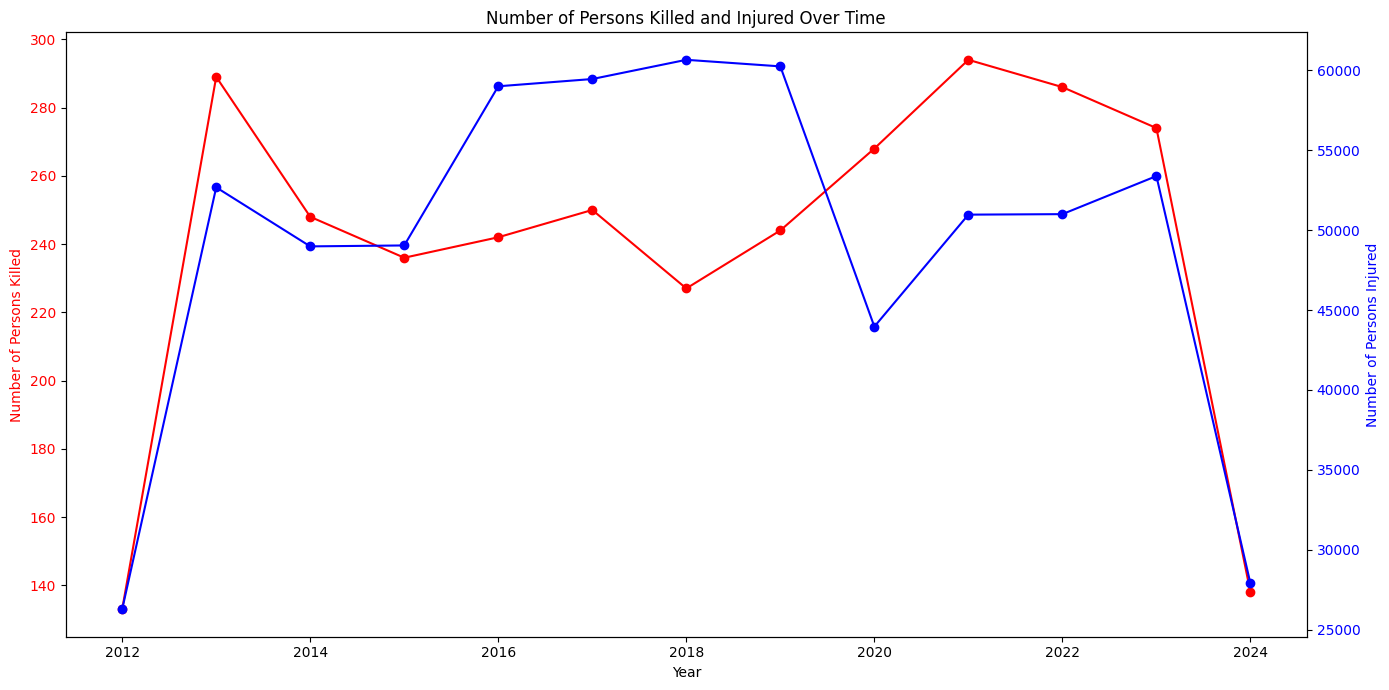

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by year and sum the number of persons killed and injured
annual_stats = df.groupby(df['CRASH DATE'].dt.year).agg({
    'NUMBER OF PERSONS KILLED': 'sum',
    'NUMBER OF PERSONS INJURED': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of persons killed
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Persons Killed', color='red')
ax1.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS KILLED'], marker='o', color='red', label='Number of Persons Killed')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for number of persons injured
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Persons Injured', color='blue')
ax2.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS INJURED'], marker='o', color='blue', label='Number of Persons Injured')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Persons Killed and Injured Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

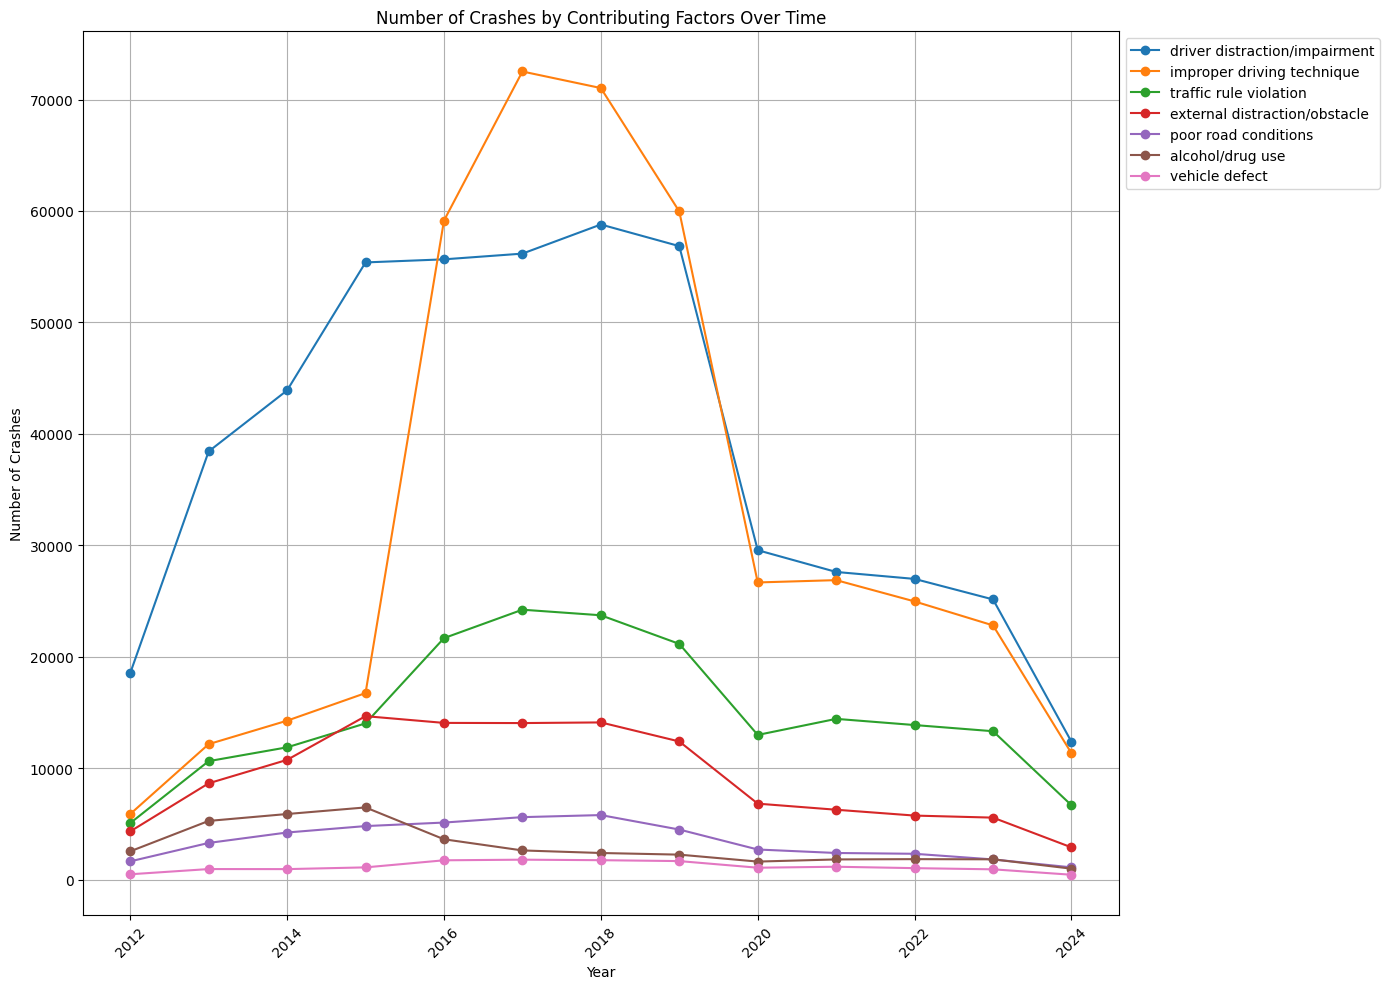

In [37]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Count number of crashes by year and contributing factor
annual_factors = df.groupby([df['CRASH DATE'].dt.year, 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='NUMBER OF CRASHES')

# List of contributing factors to loop through
contributing_factors = [
    'driver distraction/impairment',
    'improper driving technique',
    'traffic rule violation',
    'external distraction/obstacle',
    'poor road conditions',
    'alcohol/drug use',
    'vehicle defect'
]

plt.figure(figsize=(14, 10))

for factor in contributing_factors:
    factor_data = annual_factors[annual_factors['CONTRIBUTING FACTOR VEHICLE 1'] == factor]
    
    plt.plot(factor_data['CRASH DATE'], factor_data['NUMBER OF CRASHES'], marker='o', label=f'{factor}')

plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Contributing Factors Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
df.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'FULL ADDRESS', 'HOUSE NUMBER', 'ROAD', 'NEIGHBOURHOOD', 'SUBURB',
       'POSTCODE', 'day_of_week', 'is_weekend', 'CRASH HOUR', 'is_holiday',
       'holiday_name'],
      dtype='object')

In [39]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
unspecified                      700356
driver distraction/impairment    505494
improper driving technique       424502
traffic rule violation           193890
external distraction/obstacle    120582
poor road conditions              45626
alcohol/drug use                  39445
vehicle defect                    15357
electronics use                    3359
police chase                         97
Name: count, dtype: int64

## Results

In Progress!

In Progress!

## Conclusion

In Progress!

## References

In Progress!